In [1]:
from fastai.vision.all import *

In [2]:
DATASETS_PATH = Path("/datasets/food-101")
DATASETS_PATH

Path('/datasets/food-101')

In [3]:
DATASETS_PATH.ls()

(#5) [Path('/datasets/food-101/license_agreement.txt'),Path('/datasets/food-101/models'),Path('/datasets/food-101/README.txt'),Path('/datasets/food-101/meta'),Path('/datasets/food-101/images')]

In [4]:
filepaths = get_image_files(DATASETS_PATH/'images')
filepaths

(#101000) [Path('/datasets/food-101/images/club_sandwich/2400826.jpg'),Path('/datasets/food-101/images/club_sandwich/311257.jpg'),Path('/datasets/food-101/images/club_sandwich/235515.jpg'),Path('/datasets/food-101/images/club_sandwich/3362264.jpg'),Path('/datasets/food-101/images/club_sandwich/2165496.jpg'),Path('/datasets/food-101/images/club_sandwich/1949834.jpg'),Path('/datasets/food-101/images/club_sandwich/797815.jpg'),Path('/datasets/food-101/images/club_sandwich/3259380.jpg'),Path('/datasets/food-101/images/club_sandwich/148714.jpg'),Path('/datasets/food-101/images/club_sandwich/3705552.jpg')...]

In [5]:
filepaths[0].name

'2400826.jpg'

In [6]:
filepaths[0].parent.name

'club_sandwich'

In [7]:
def label_func(filepath):
    return filepath.parent.name

In [8]:
label_func(filepaths[10001])

'garlic_bread'

In [9]:
dls = ImageDataLoaders.from_path_func(DATASETS_PATH, filepaths, label_func, item_tfms=Resize(224))

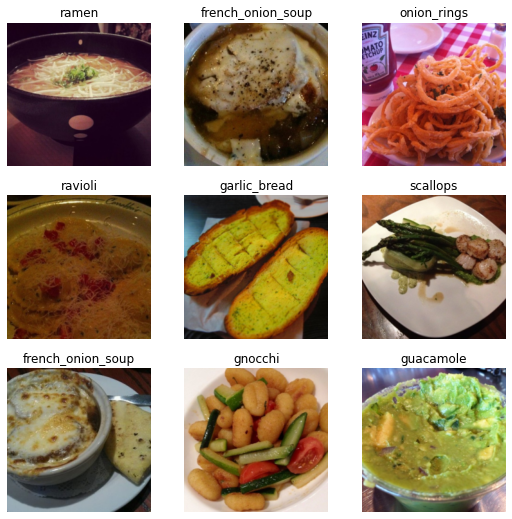

In [10]:
dls.show_batch()

In [11]:
dls = ImageDataLoaders.from_path_func(DATASETS_PATH, filepaths, label_func,
                                      bs=64*3,
                                      item_tfms=Resize(460),
                                      batch_tfms=aug_transforms(size=224))

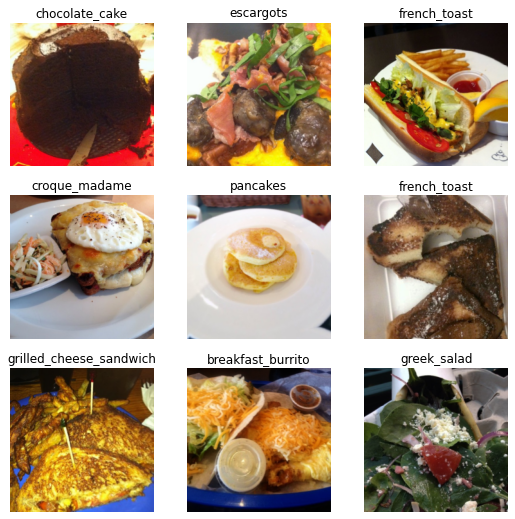

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

SuggestedLRs(valley=0.0006918309954926372)

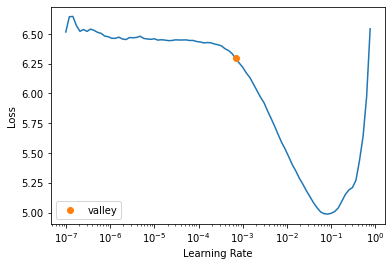

In [14]:
learn.lr_find()

In [15]:
1e-3, 1e-2, 1e-1

(0.001, 0.01, 0.1)

In [16]:
learn.fine_tune(8, 2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.113539,1.549666,0.400446,04:26


epoch,train_loss,valid_loss,error_rate,time
0,1.358172,1.074143,0.285347,05:04
1,1.139422,0.957066,0.256782,05:02
2,0.928074,0.896948,0.237624,05:02
3,0.763571,0.803364,0.212723,05:02
4,0.579667,0.755129,0.195099,05:02
5,0.425497,0.737585,0.187129,05:02
6,0.301966,0.716350,0.181436,05:03
7,0.253073,0.714648,0.179257,05:02


In [17]:
learn.path = Path('./models')
learn.path

Path('models')

In [18]:
learn.export(fname='food-101-resnet50.pkl')

In [19]:
learn.path.ls()

(#2) [Path('models/food-101-resnet34.pkl'),Path('models/food-101-resnet50.pkl')]